In [22]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix


from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

print("Kütüphaneler yüklendi.")

Kütüphaneler yüklendi.


In [23]:
df = pd.read_csv("NYC_Crash_Model_Final_Last.csv")

FEATURES = [
    
    'VEHICLE_1_GROUP_Emergency', 'VEHICLE_1_GROUP_Heavy Duty', 
    'VEHICLE_1_GROUP_Passenger Car', 'VEHICLE_1_GROUP_Taxi/Commercial', 
    'VEHICLE_1_GROUP_Two Wheeler',
    'VEHICLE_2_GROUP_Emergency', 'VEHICLE_2_GROUP_Heavy Duty', 
    'VEHICLE_2_GROUP_Passenger Car', 'VEHICLE_2_GROUP_Taxi/Commercial', 
    'VEHICLE_2_GROUP_Two Wheeler',
    
    'ROAD_TYPE_ARTERIES_HIGHWAYS', 'ROAD_TYPE_LOCAL_MAIN_ROADS', 'ROAD_TYPE_SPECIAL_AREAS',
    'IS_MULTI_VEHICLE',
    
    'HOUR', 'DAY_OF_WEEK',
    
    'BOROUGH_BRONX', 'BOROUGH_BROOKLYN', 'BOROUGH_MANHATTAN', 
    'BOROUGH_QUEENS', 'BOROUGH_STATEN ISLAND',
    
    'FACTOR_1_GROUP_Aggressive Driving', 'FACTOR_1_GROUP_Distracted',
    'FACTOR_1_GROUP_Environmental', 'FACTOR_1_GROUP_Fatigued',
    'FACTOR_1_GROUP_Impaired', 'FACTOR_1_GROUP_Mechanical Failure',
    'FACTOR_1_GROUP_Unspecified',
    'FACTOR_2_GROUP_Aggressive Driving', 'FACTOR_2_GROUP_Distracted',
    'FACTOR_2_GROUP_Environmental', 'FACTOR_2_GROUP_Fatigued',
    'FACTOR_2_GROUP_Impaired', 'FACTOR_2_GROUP_Mechanical Failure',
    'FACTOR_2_GROUP_No Contribution'
]

TARGET_COLUMN = "SEVERITY"

print(f"Toplam {len(FEATURES)} özellik belirlendi.")

Toplam 35 özellik belirlendi.


In [24]:
df_model = df.dropna(subset=FEATURES + [TARGET_COLUMN])
X = df_model[FEATURES]
y = df_model[TARGET_COLUMN]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Veri hazırlandı, bölündü ve ölçeklendi.")
print(f"Train Boyutu: {X_train.shape}, Test Boyutu: {X_test.shape}")

Veri hazırlandı, bölündü ve ölçeklendi.
Train Boyutu: (1528858, 35), Test Boyutu: (382215, 35)


In [25]:
def model_raporu(model, model_adi, X_test, y_test):
    start = time.time()
    
    y_pred = model.predict(X_test)
    
    try:
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
            roc = roc_auc_score(y_test, y_prob)
        elif hasattr(model, "decision_function"):
            y_prob = model.decision_function(X_test)
            roc = roc_auc_score(y_test, y_prob)
        else:
            roc = 0.5
    except:
        roc = 0.0
        
    end = time.time()
    
    print(f"==== {model_adi} ====")
    print(f"Süre: {end - start:.4f} saniye")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC : {roc:.4f}")
    print("-" * 30)
    print(classification_report(y_test, y_pred))
    print("=" * 30)

In [26]:
print("Logistic Regression eğitiliyor...")
log_reg = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train)

model_raporu(log_reg, "Logistic Regression", X_test_scaled, y_test)

Logistic Regression eğitiliyor...
==== Logistic Regression ====
Süre: 0.0896 saniye
Accuracy: 0.6824
ROC AUC : 0.6787
------------------------------
              precision    recall  f1-score   support

           0       0.82      0.74      0.78    289566
           1       0.38      0.51      0.44     92649

    accuracy                           0.68    382215
   macro avg       0.60      0.62      0.61    382215
weighted avg       0.72      0.68      0.70    382215



In [27]:
print("Decision Tree eğitiliyor...")
tree_clf = DecisionTreeClassifier(max_depth=15, class_weight='balanced', random_state=42)
tree_clf.fit(X_train_scaled, y_train)

model_raporu(tree_clf, "Decision Tree", X_test_scaled, y_test)

Decision Tree eğitiliyor...
==== Decision Tree ====
Süre: 0.1027 saniye
Accuracy: 0.7095
ROC AUC : 0.6984
------------------------------
              precision    recall  f1-score   support

           0       0.83      0.77      0.80    289566
           1       0.42      0.51      0.46     92649

    accuracy                           0.71    382215
   macro avg       0.62      0.64      0.63    382215
weighted avg       0.73      0.71      0.72    382215



In [28]:
print("Gaussian NB eğitiliyor...")
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

model_raporu(gnb, "Gaussian Naive Bayes", X_test_scaled, y_test)

Gaussian NB eğitiliyor...
==== Gaussian Naive Bayes ====
Süre: 0.1558 saniye
Accuracy: 0.7666
ROC AUC : 0.6594
------------------------------
              precision    recall  f1-score   support

           0       0.80      0.93      0.86    289566
           1       0.54      0.27      0.36     92649

    accuracy                           0.77    382215
   macro avg       0.67      0.60      0.61    382215
weighted avg       0.73      0.77      0.74    382215



In [29]:
print("Ridge ve SGD eğitiliyor...")

ridge_clf = RidgeClassifier(class_weight='balanced', random_state=42)
ridge_clf.fit(X_train_scaled, y_train)
model_raporu(ridge_clf, "Ridge Classifier", X_test_scaled, y_test)

sgd_clf = SGDClassifier(loss='hinge', class_weight='balanced', random_state=42)
sgd_clf.fit(X_train_scaled, y_train)
model_raporu(sgd_clf, "SGD Classifier", X_test_scaled, y_test)

Ridge ve SGD eğitiliyor...
==== Ridge Classifier ====
Süre: 0.0701 saniye
Accuracy: 0.6938
ROC AUC : 0.6783
------------------------------
              precision    recall  f1-score   support

           0       0.82      0.76      0.79    289566
           1       0.39      0.49      0.44     92649

    accuracy                           0.69    382215
   macro avg       0.61      0.62      0.61    382215
weighted avg       0.72      0.69      0.70    382215

==== SGD Classifier ====
Süre: 0.0740 saniye
Accuracy: 0.6879
ROC AUC : 0.6592
------------------------------
              precision    recall  f1-score   support

           0       0.82      0.76      0.79    289566
           1       0.38      0.48      0.43     92649

    accuracy                           0.69    382215
   macro avg       0.60      0.62      0.61    382215
weighted avg       0.71      0.69      0.70    382215



In [30]:
print("KNN eğitiliyor...")
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train_scaled, y_train)

model_raporu(knn, "KNN (K-Nearest Neighbors)", X_test_scaled, y_test)

KNN eğitiliyor...
==== KNN (K-Nearest Neighbors) ====
Süre: 342.5252 saniye
Accuracy: 0.7582
ROC AUC : 0.6391
------------------------------
              precision    recall  f1-score   support

           0       0.80      0.91      0.85    289566
           1       0.50      0.29      0.37     92649

    accuracy                           0.76    382215
   macro avg       0.65      0.60      0.61    382215
weighted avg       0.73      0.76      0.73    382215



Decision Tree (Karar Ağacı) analiz ediliyor...


/var/folders/g7/79160ktd5rz2zv_pl2fdc4xr0000gn/T/ipykernel_4116/1536349659.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette="viridis")


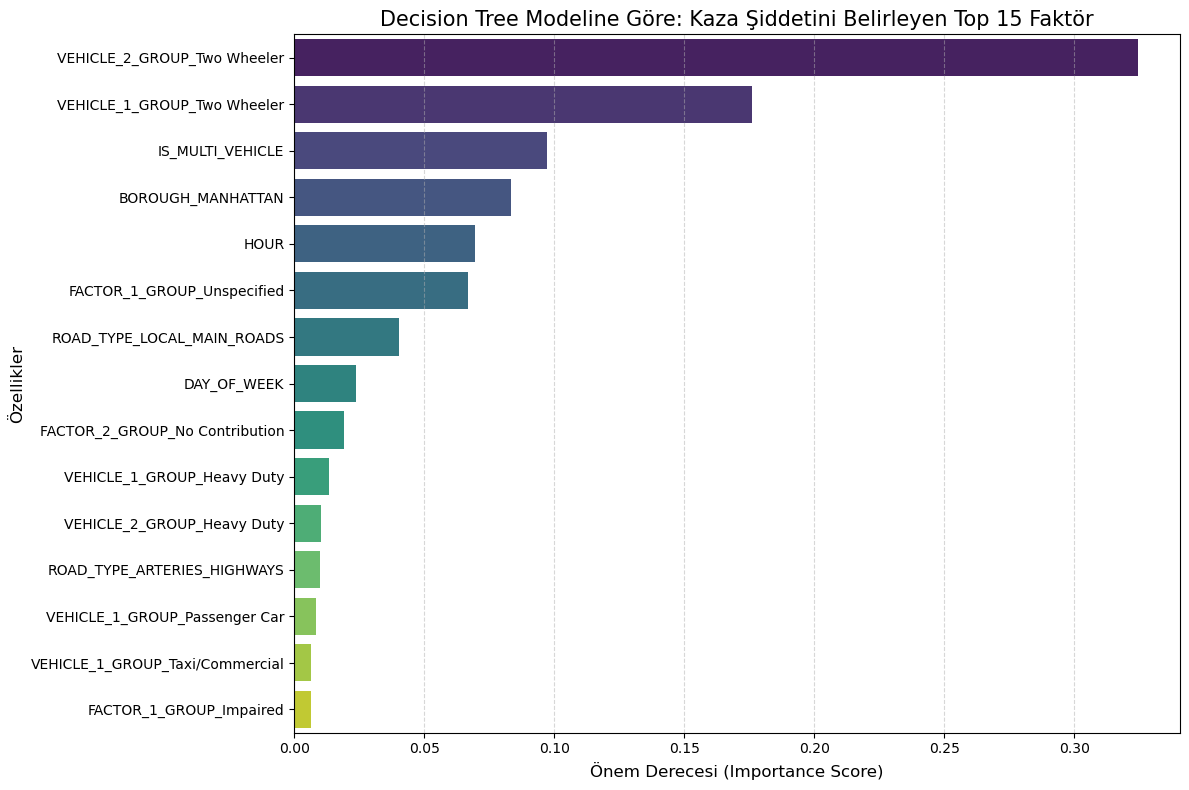

Yorum: En üstteki çubuklar, kazanın ağır olup olmayacağına karar veren ana unsurlardır.


In [31]:
print("Decision Tree (Karar Ağacı) analiz ediliyor...")

if 'tree_clf' in locals():
    importances = tree_clf.feature_importances_
    
    feature_imp_df = pd.DataFrame({
        'Feature': FEATURES,
        'Importance': importances
    })
    
    top_features = feature_imp_df.sort_values(by='Importance', ascending=False).head(15)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=top_features, palette="viridis")
    
    plt.title('Decision Tree Modeline Göre: Kaza Şiddetini Belirleyen Top 15 Faktör', fontsize=15)
    plt.xlabel('Önem Derecesi (Importance Score)', fontsize=12)
    plt.ylabel('Özellikler', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    
    print("Yorum: En üstteki çubuklar, kazanın ağır olup olmayacağına karar veren ana unsurlardır.")
else:
    print("HATA: 'tree_clf' modeli bulunamadı. Lütfen önce Decision Tree hücresini çalıştır.")

Logistic Regression katsayıları analiz ediliyor...


/var/folders/g7/79160ktd5rz2zv_pl2fdc4xr0000gn/T/ipykernel_4116/3943546440.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_coefs, palette=colors)


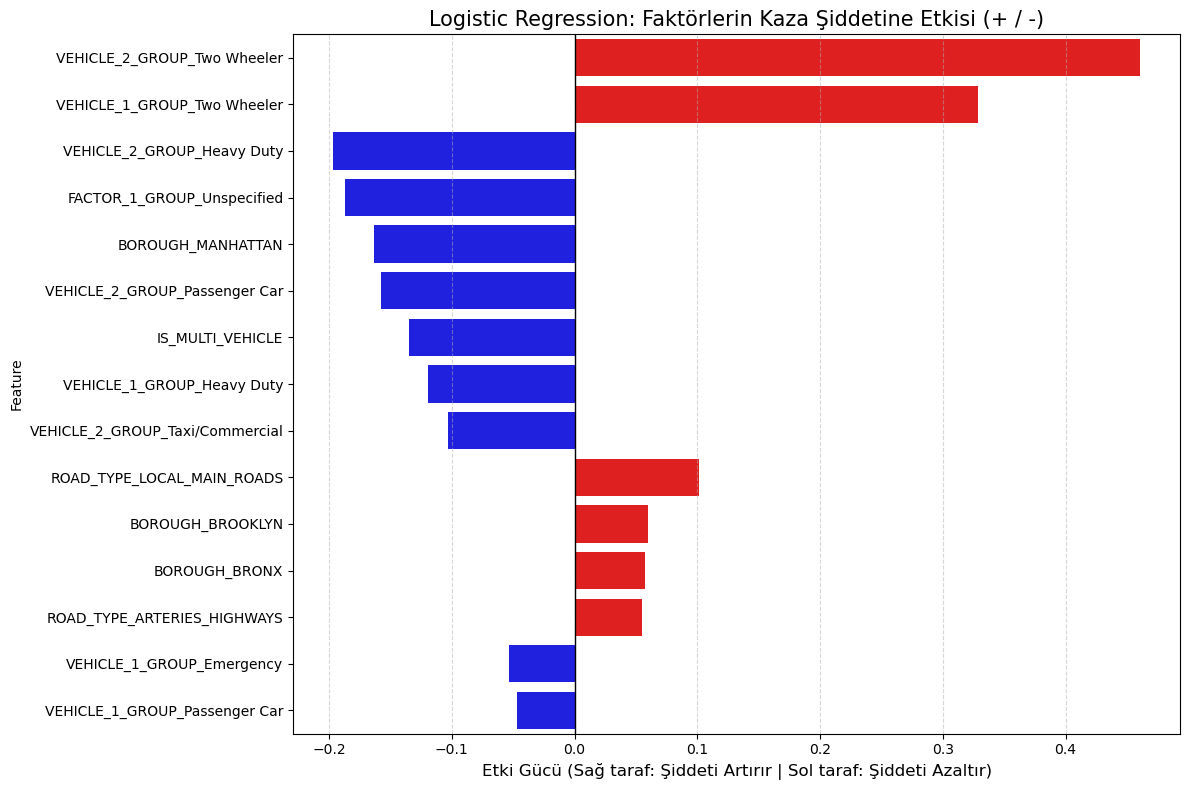

Yorum: Kırmızı çubuklar tehlikeyi artıranlar, Mavi çubuklar kazayı hafifleten faktörlerdir.


In [32]:
print("Logistic Regression katsayıları analiz ediliyor...")

if 'log_reg' in locals():
    coefficients = log_reg.coef_[0]
    
    feature_coef_df = pd.DataFrame({
        'Feature': FEATURES,
        'Coefficient': coefficients
    })

    feature_coef_df['Abs_Coef'] = feature_coef_df['Coefficient'].abs()
    top_coefs = feature_coef_df.sort_values(by='Abs_Coef', ascending=False).head(15)

    plt.figure(figsize=(12, 8))
    colors = ['red' if c > 0 else 'blue' for c in top_coefs['Coefficient']]
    
    sns.barplot(x='Coefficient', y='Feature', data=top_coefs, palette=colors)
    
    plt.title('Logistic Regression: Faktörlerin Kaza Şiddetine Etkisi (+ / -)', fontsize=15)
    plt.xlabel('Etki Gücü (Sağ taraf: Şiddeti Artırır | Sol taraf: Şiddeti Azaltır)', fontsize=12)
    plt.axvline(x=0, color='black', linestyle='-', linewidth=1) # Sıfır noktasına çizgi
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    
    print("Yorum: Kırmızı çubuklar tehlikeyi artıranlar, Mavi çubuklar kazayı hafifleten faktörlerdir.")

else:
    print("HATA: 'log_reg' modeli bulunamadı. Lütfen önce Logistic Regression hücresini çalıştır.")

/var/folders/g7/79160ktd5rz2zv_pl2fdc4xr0000gn/T/ipykernel_4116/3745600224.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_coefs, palette=colors)



--- SGD Classifier Analizi ---


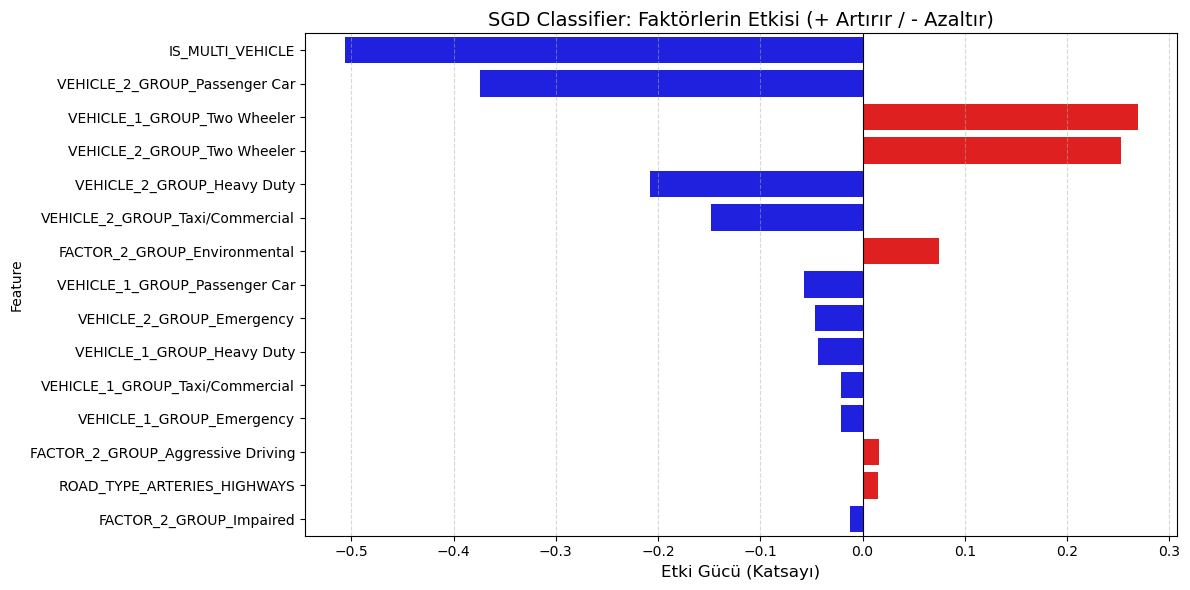

In [33]:
def plot_linear_coefficients(model, model_name, feature_names):
   
    if not hasattr(model, 'coef_'):
        print(f"UYARI: {model_name} modelinin katsayıları (coef_) bulunamadı.")
        return

    coefficients = model.coef_[0]
    
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    })
    
    coef_df['Abs_Coef'] = coef_df['Coefficient'].abs()
    top_coefs = coef_df.sort_values(by='Abs_Coef', ascending=False).head(15)
    
    plt.figure(figsize=(12, 6))
    colors = ['red' if c > 0 else 'blue' for c in top_coefs['Coefficient']]
    
    sns.barplot(x='Coefficient', y='Feature', data=top_coefs, palette=colors)
    
    plt.title(f'{model_name}: Faktörlerin Etkisi (+ Artırır / - Azaltır)', fontsize=14)
    plt.xlabel('Etki Gücü (Katsayı)', fontsize=12)
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

if 'sgd_clf' in locals():
    print("\n--- SGD Classifier Analizi ---")
    plot_linear_coefficients(sgd_clf, "SGD Classifier", FEATURES)
else:
    print("SGD modeli hafızada yok. Önce SGD hücresini çalıştır.")

Confusion Matrixler çiziliyor...


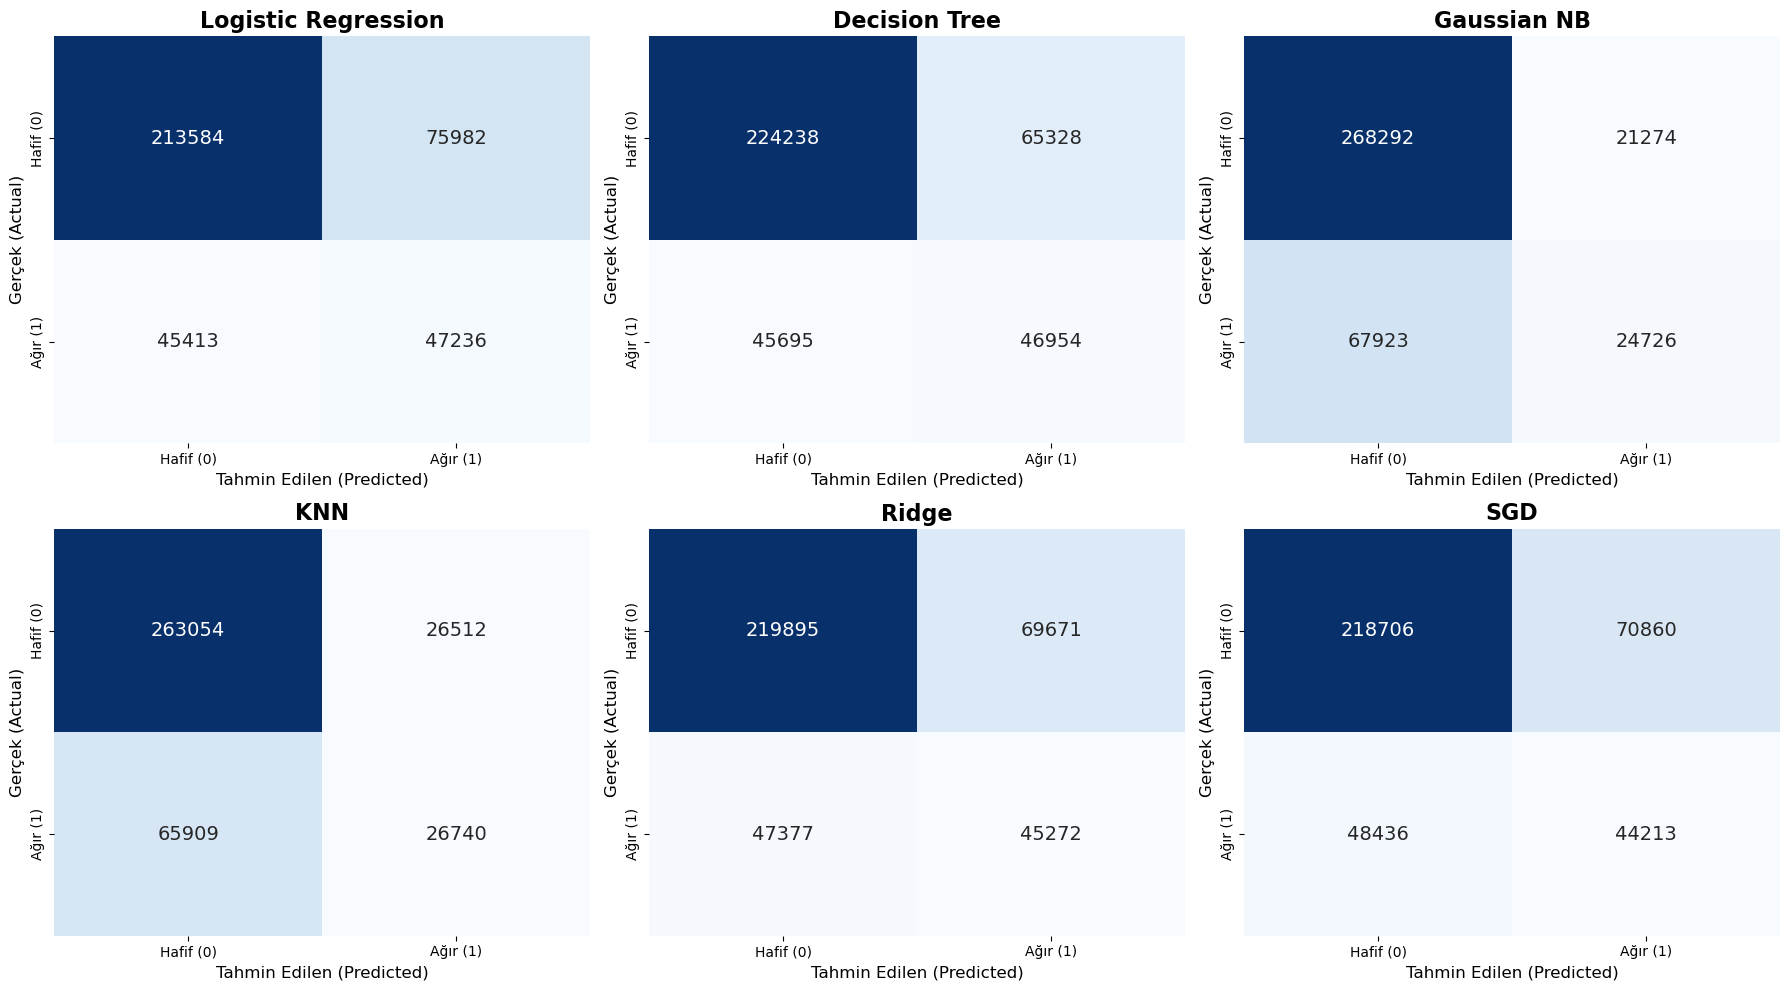

In [34]:
from sklearn.metrics import confusion_matrix
import math

trained_models = {}
if 'log_reg' in locals(): trained_models['Logistic Regression'] = log_reg
if 'tree_clf' in locals(): trained_models['Decision Tree'] = tree_clf
if 'gnb' in locals(): trained_models['Gaussian NB'] = gnb
if 'knn' in locals(): trained_models['KNN'] = knn
if 'ridge_clf' in locals(): trained_models['Ridge'] = ridge_clf
if 'sgd_clf' in locals(): trained_models['SGD'] = sgd_clf

n_models = len(trained_models)
cols = 3
rows = math.ceil(n_models / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()

print("Confusion Matrixler çiziliyor...")

for i, (name, model) in enumerate(trained_models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False, annot_kws={"size": 14})
    
    axes[i].set_title(name, fontsize=16, fontweight='bold')
    axes[i].set_xlabel('Tahmin Edilen (Predicted)', fontsize=12)
    axes[i].set_ylabel('Gerçek (Actual)', fontsize=12)
    axes[i].set_xticklabels(['Hafif (0)', 'Ağır (1)'])
    axes[i].set_yticklabels(['Hafif (0)', 'Ağır (1)'])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


ROC Eğrileri hazırlanıyor...


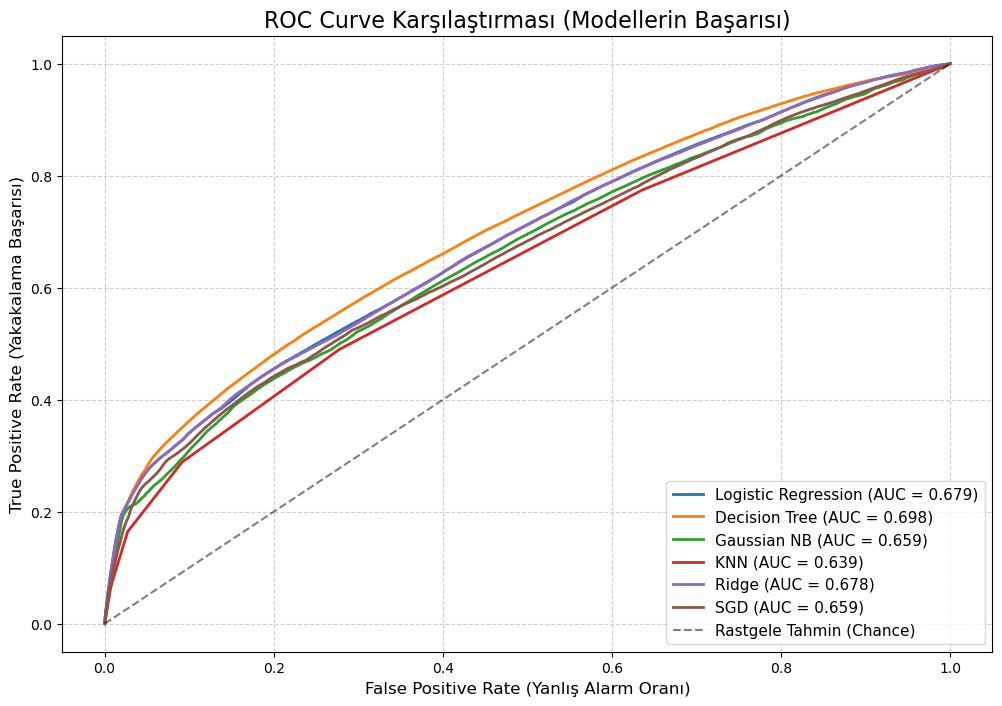

YORUM: Çizgisi en solda ve en üstte olan model en kararlı modeldir. AUC değeri 1.0'a ne kadar yakınsa o kadar iyidir.


In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(12, 8))

print("ROC Eğrileri hazırlanıyor...")

for name, model in trained_models.items():
    y_prob = None
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test_scaled)
    else:
        print(f"UYARI: {name} için olasılık hesaplanamadı, grafiğe eklenmiyor.")
        continue

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Rastgele Tahmin (Chance)', alpha=0.5)

plt.title('ROC Curve Karşılaştırması (Modellerin Başarısı)', fontsize=16)
plt.xlabel('False Positive Rate (Yanlış Alarm Oranı)', fontsize=12)
plt.ylabel('True Positive Rate (Yakakalama Başarısı)', fontsize=12)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("YORUM: Çizgisi en solda ve en üstte olan model en kararlı modeldir. AUC değeri 1.0'a ne kadar yakınsa o kadar iyidir.")

Precision-Recall Eğrileri hazırlanıyor...


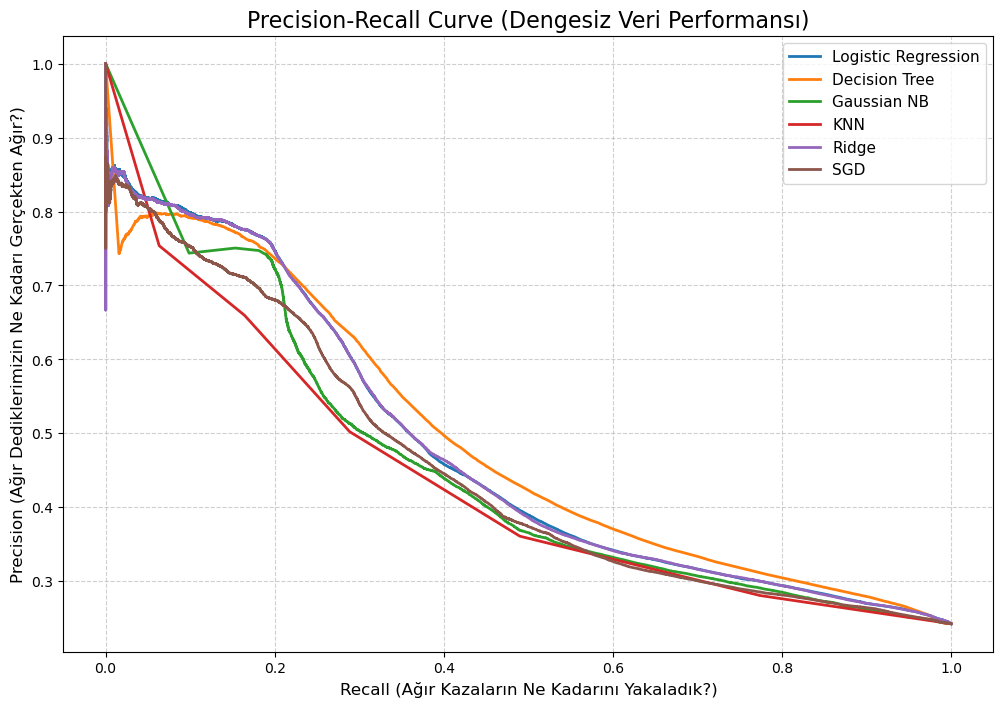

In [36]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(12, 8))

print("Precision-Recall Eğrileri hazırlanıyor...")

for name, model in trained_models.items():
    y_prob = None
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test_scaled)
    else:
        continue

    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    
    plt.plot(recall, precision, label=name, linewidth=2)

plt.title('Precision-Recall Curve (Dengesiz Veri Performansı)', fontsize=16)
plt.xlabel('Recall (Ağır Kazaların Ne Kadarını Yakaladık?)', fontsize=12)
plt.ylabel('Precision (Ağır Dediklerimizin Ne Kadarı Gerçekten Ağır?)', fontsize=12)
plt.legend(loc='best', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [37]:
def interaktif_kaza_tahmini(model, scaler, feature_columns):
    print("\n" + "="*50)
    print("CANLI KAZA TAHMİN PANELİNE HOŞGELDİNİZ ")
    print("="*50)
    print("Lütfen aşağıdaki senaryo bilgilerini giriniz...\n")

    input_data = pd.DataFrame(0, index=[0], columns=feature_columns)

    try:
       
        print("ZAMAN BİLGİSİ")
        saat = int(input("Kaza saati kaç? (0-23 arası bir sayı girin): "))
        input_data['HOUR'] = saat
        
        gun = int(input("Haftanın hangi günü? (0=Pazartesi ... 6=Pazar): "))
        input_data['DAY_OF_WEEK'] = gun
        print("-" * 30)

        print("YOL TİPİ SEÇİMİ")
        print("   [1] Otoban / Anayol (Arteries/Highways)")
        print("   [2] Şehir İçi / Sokak (Local/Main Roads)")
        print("   [3] Özel Alan (Tünel/Köprü vb.)")
        yol_secim = input("Seçiminiz (1, 2 veya 3): ")
        
        if yol_secim == '1': input_data['ROAD_TYPE_ARTERIES_HIGHWAYS'] = 1
        elif yol_secim == '2': input_data['ROAD_TYPE_LOCAL_MAIN_ROADS'] = 1
        elif yol_secim == '3': input_data['ROAD_TYPE_SPECIAL_AREAS'] = 1
        print("-" * 30)

        print("ARAÇ TİPLERİ (Kaza yapan araçlar)")
        print("   [1] Binek Araç (Passenger Car)")
        print("   [2] Ağır Vasıta (Kamyon/Tır - Heavy Duty)")
        print("   [3] İki Tekerlekli (Motosiklet/Bisiklet)")
        print("   [4] Taksi / Ticari")
        
        arac1 = input(" 1. Aracın Tipi Nedir? (1-4): ")
        arac2 = input(" 2. Aracın Tipi Nedir? (1-4): ")

        if arac1 == '1': input_data['VEHICLE_1_GROUP_Passenger Car'] = 1
        elif arac1 == '2': input_data['VEHICLE_1_GROUP_Heavy Duty'] = 1
        elif arac1 == '3': input_data['VEHICLE_1_GROUP_Two Wheeler'] = 1
        elif arac1 == '4': input_data['VEHICLE_1_GROUP_Taxi/Commercial'] = 1
        
        if arac2 == '1': input_data['VEHICLE_2_GROUP_Passenger Car'] = 1
        elif arac2 == '2': input_data['VEHICLE_2_GROUP_Heavy Duty'] = 1
        elif arac2 == '3': input_data['VEHICLE_2_GROUP_Two Wheeler'] = 1
        elif arac2 == '4': input_data['VEHICLE_2_GROUP_Taxi/Commercial'] = 1
        print("-" * 30)

        print("SÜRÜCÜ FAKTÖRLERİ (Ana neden ne?)")
        print("   [1] Alkol / Madde Etkisi (Impaired)")
        print("   [2] Dikkatsizlik (Telefonla oynama vb.)")
        print("   [3] Agresif Sürüş / Hız")
        print("   [4] Yorgunluk / Uyuma")
        print("   [5] Bilinmiyor / Diğer")
        
        faktor = input("Sürücü hatası nedir? (1-5): ")

        if faktor == '1': input_data['FACTOR_1_GROUP_Impaired'] = 1
        elif faktor == '2': input_data['FACTOR_1_GROUP_Distracted'] = 1
        elif faktor == '3': input_data['FACTOR_1_GROUP_Aggressive Driving'] = 1
        elif faktor == '4': input_data['FACTOR_1_GROUP_Fatigued'] = 1
        elif faktor == '5': input_data['FACTOR_1_GROUP_Unspecified'] = 1 
        
        print("\n Model analiz yapıyor... Lütfen bekleyiniz...")
        
        input_scaled = scaler.transform(input_data)
        
        tahmin = model.predict(input_scaled)[0]
        
        olasilik_mesaji = ""
        if hasattr(model, "predict_proba"):
            probs = model.predict_proba(input_scaled)[0]
            prob_0 = probs[0] 
            prob_1 = probs[1] 
            
            if tahmin == 1:
                guven = prob_1
            else:
                guven = prob_0
            olasilik_mesaji = f"(Güven Oranı: %{guven*100:.1f})"

        print("\n" + "="*50)
        print("ANALİZ SONUCU")
        print("="*50)
        
        if tahmin == 1:
            print(f"\n SONUÇ: CİDDİ / AĞIR KAZA (Severity 1)")
            print(f" {olasilik_mesaji}")
            print("\n Modelin Yorumu: Bu şartlar (özellikle seçilen araç tipi ve saat),\nkazanın ölümcül veya ağır yaralanmalı olma riskini çok artırıyor.")
        else:
            print(f"\n SONUÇ: HAFİF / MADDİ HASARLI KAZA (Severity 0)")
            print(f" {olasilik_mesaji}")
            print("\n Modelin Yorumu: Kaza gerçekleşse bile, şartlar hafif atlatılacağını gösteriyor.")
            
        print("\n" + "="*50)

    except ValueError:
        print("\n HATA: Lütfen sadece sayısal değerler giriniz!")
    except Exception as e:
        print(f"\n Bir hata oluştu: {e}")
        
if 'tree_clf' in locals():
    while True:
        interaktif_kaza_tahmini(tree_clf, scaler, FEATURES)
        devam = input("\nBaşka bir senaryo denemek ister misiniz? (e/h): ")
        if devam.lower() != 'e':
            print("Panel kapatıldı. İyi çalışmalar!")
            break
elif 'log_reg' in locals():
    interaktif_kaza_tahmini(log_reg, scaler, FEATURES)
else:
    print("Model bulunamadı. Lütfen önce modelleri eğitin.")


CANLI KAZA TAHMİN PANELİNE HOŞGELDİNİZ 
Lütfen aşağıdaki senaryo bilgilerini giriniz...

ZAMAN BİLGİSİ


Kaza saati kaç? (0-23 arası bir sayı girin):  3
Haftanın hangi günü? (0=Pazartesi ... 6=Pazar):  4


------------------------------
YOL TİPİ SEÇİMİ
   [1] Otoban / Anayol (Arteries/Highways)
   [2] Şehir İçi / Sokak (Local/Main Roads)
   [3] Özel Alan (Tünel/Köprü vb.)


Seçiminiz (1, 2 veya 3):  1


------------------------------
ARAÇ TİPLERİ (Kaza yapan araçlar)
   [1] Binek Araç (Passenger Car)
   [2] Ağır Vasıta (Kamyon/Tır - Heavy Duty)
   [3] İki Tekerlekli (Motosiklet/Bisiklet)
   [4] Taksi / Ticari


 1. Aracın Tipi Nedir? (1-4):  3
 2. Aracın Tipi Nedir? (1-4):  3


------------------------------
SÜRÜCÜ FAKTÖRLERİ (Ana neden ne?)
   [1] Alkol / Madde Etkisi (Impaired)
   [2] Dikkatsizlik (Telefonla oynama vb.)
   [3] Agresif Sürüş / Hız
   [4] Yorgunluk / Uyuma
   [5] Bilinmiyor / Diğer


Sürücü hatası nedir? (1-5):  motorcycle



 Model analiz yapıyor... Lütfen bekleyiniz...

ANALİZ SONUCU

 SONUÇ: CİDDİ / AĞIR KAZA (Severity 1)
 (Güven Oranı: %100.0)

 Modelin Yorumu: Bu şartlar (özellikle seçilen araç tipi ve saat),
kazanın ölümcül veya ağır yaralanmalı olma riskini çok artırıyor.




Başka bir senaryo denemek ister misiniz? (e/h):  h


Panel kapatıldı. İyi çalışmalar!


In [38]:

from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

models_to_check = {
    "Logistic Regression": locals().get('log_reg'),
    "Decision Tree": locals().get('tree_clf'),
    "Gaussian NB": locals().get('gnb'),
    "KNN": locals().get('knn'),
    "Ridge Classifier": locals().get('ridge_clf'),
    "SGD Classifier": locals().get('sgd_clf')
}

results_data = []

print("Modeller karşılaştırılıyor...")

for name, model in models_to_check.items():
    if model is None:
        continue 
        
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    
    rec_1 = recall_score(y_test, y_pred, pos_label=1)
    rec_0 = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    
    roc_val = 0.5 
    try:
        if hasattr(model, "predict_proba"):
            probs = model.predict_proba(X_test_scaled)[:, 1]
            roc_val = roc_auc_score(y_test, probs)
        elif hasattr(model, "decision_function"):
            probs = model.decision_function(X_test_scaled)
            roc_val = roc_auc_score(y_test, probs)
    except:
        pass 

    results_data.append({
        "Model": name,
        "Accuracy (Genel)": acc,
        "Recall 1 (AĞIR KAZA)": rec_1, 
        "Recall 0 (Hafif Kaza)": rec_0,
        "F1 Score": f1,
        "ROC AUC": roc_val
    })
df_results = pd.DataFrame(results_data)

df_results = df_results.sort_values(by="Recall 1 (AĞIR KAZA)", ascending=False)

def highlight_best(s):
    is_max = s == s.max()
    return ['background-color: #d1ffbd' if v else '' for v in is_max]

print("\n MODELLERİN KARŞILAŞTIRMALI KARNESİ ")
print("(Tablo 'Recall 1' başarısına göre sıralanmıştır)")

display_df = df_results.copy()
cols = display_df.columns[1:] 
for col in cols:
    display_df[col] = display_df[col].apply(lambda x: f"%{x*100:.1f}")

display(display_df)

Modeller karşılaştırılıyor...

 MODELLERİN KARŞILAŞTIRMALI KARNESİ 
(Tablo 'Recall 1' başarısına göre sıralanmıştır)


,Model,Accuracy (Genel),Recall 1 (AĞIR KAZA),Recall 0 (Hafif Kaza),F1 Score,ROC AUC
0,Logistic Regression,%68.2,%51.0,%73.8,%43.8,%67.9
1,Decision Tree,%71.0,%50.7,%77.4,%45.8,%69.8
4,Ridge Classifier,%69.4,%48.9,%75.9,%43.6,%67.8
5,SGD Classifier,%68.8,%47.7,%75.5,%42.6,%65.9
3,KNN,%75.8,%28.9,%90.8,%36.7,%63.9
2,Gaussian NB,%76.7,%26.7,%92.7,%35.7,%65.9
